In [171]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# CSV 파일 경로 설정
file_path = r'C:\Users\HOME\Desktop\skt_6_aifellowship\idcube-ai-assistant-fellowship\data_from_Chayoung\chat_history전달용.csv'
# CSV 파일 읽기
df = pd.read_csv(file_path)
# question 컬럼의 값들의 중복 횟수 세기
question_counts = df['question'].value_counts()
# 값과 횟수 출력
print(len(df['question']))
start = 0
for question, count in question_counts.items():
    start += count
    print(f"{question}: {count}, {start}")

241
최근 일주일간 본부별 HDV CEI 조회해줘: 87, 87
오늘 Core운용1팀, Core운용2팀 예정 작업 보여 줘: 17, 104
오늘 IP 백본 포트별 5분 KPI 통계 조회해줘: 14, 118
24년 3월 세븐틴콘서트에서 시도호가 많았던 LTE장비 순으로 10개 보여주고, 동접자수와 트래픽양도 같이 보여 줘: 12, 130
23년 타종식 이벤트 분석 리포트 작성해줘: 10, 140
어제 IP 백홀 작업 목록 조회해줘: 9, 149
안녕: 5, 154
24년 3월 27일의 MME별 Attach 성공율을 시간단위로 보여 줘: 4, 158
SGW별 5G CEI테이블에서, 24년 5월 8일 SGW별로 Data접속시도호를 시간단위로 보여 줘: 3, 161
오늘 수도권Access개선팀 작업 알려 줘: 2, 163
24년 3월 세븐틴콘서트에서 시도호가 많았던 LTE 장비 순으로10개 보여주고, 동접자수와 트래픽양도 같이 보여 줘: 2, 165
오늘 hdv cei 높은 곳 10곳만 알려줘: 2, 167
24년 5월 8일 SGW별 Data접속성공율을 시간단위로 보여 줘: 2, 169
할수 있는게 뭔지 알려줘: 2, 171
24/05/01 전국 시간대별 CEI를 뽑아 줘: 2, 173
24년 4월 27일의 MME별 Attach 성공율을 시간단위로 보여 줘: 2, 175
어제 코어운용1팀 작업 목록 보여줘: 1, 176
어제 수도권 access 개선탬 data cfi 평균알려줘: 1, 177
cei 가 뭐야?: 1, 178
안녕 ㅎ: 1, 179
안녕하쇼: 1, 180
안녕하세요~: 1, 181
오늘 Core운용1팀 예정 작업 보여 줘: 1, 182
어제 경기도 성남시 분당구 5g 통화 품질 데이터 조회해죠: 1, 183
최근 일주일간 전국 HDV CEI 조해해줘: 1, 184
어제 서울지역 Data CEI 알려줘: 1, 185
오늘 서울 지역 LTE 품질이 어떘어?: 1, 186
안녕~: 1, 187
어제 서울지역 Data CEI 알려줘.: 1, 188
오늘 본부

1544 WITH today_data AS (   select     dt,     hh,     op_hdofc_org_nm,     op_team_org_nm,     eqp_mapp_nm,     cell_id,     concat(eqp_mapp_nm, '_', cell_id) AS "Cell명",     rrc_attempt   from d_psn.dpsn_lte_enodeb_cell_kpi_1h   where     eqp_vend_nm like '%에릭슨%'     and rrc_attempt = 0     and TO_DATE(dt, 'yyyymmdd') = current_date     and hh = '08' ),  one_week_ago_data AS (   select     dt,     hh,     eqp_mapp_nm,     cell_id,     concat(eqp_mapp_nm, '_', cell_id) AS "Cell명",     rrc_attempt   from d_psn.dpsn_lte_enodeb_cell_kpi_1h   where     eqp_vend_nm like '%에릭슨%'     and rrc_attempt >= 50     and TO_DATE(dt, 'yyyymmdd') = current_date - INTERVAL '7' DAY     and hh = '08' ),  Disabled_cell AS (   select eutrancellfdd as "Cell명"   from d_psn.dpsn_lte_elg_enb_cell_status_1h   where     TO_DATE(dt, 'yyyymmdd') = current_date     and hh = '08' ),  Cell_Sleep AS (   select cell_id as "Cell명"   from d_psn.dpsn_lte_elg_cell_mimo_sleep_kpi_1h   where     TO_DATE(dt, 'yyyymmdd') = cur

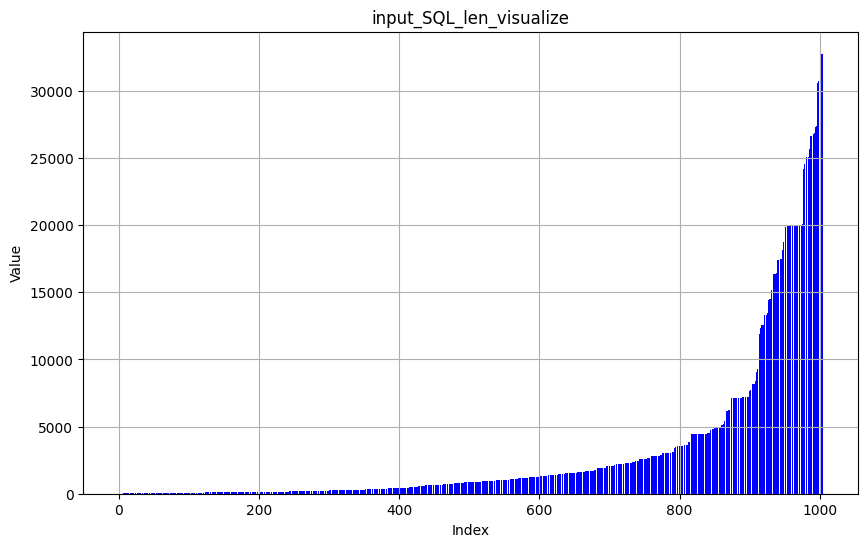

In [71]:
import pandas as pd

# Excel 파일 경로 설정
file_path = r'C:\Users\HOME\Desktop\skt_6_aifellowship\idcube-ai-assistant-fellowship\data_from_Chayoung\queryhistory_최근.xlsx'
a = "ConnectionAbortedError"
# Excel 파일 읽기
df = pd.read_excel(file_path)
# 'query' 컬럼의 값이 NaN인 행을 드롭하고 인덱스 리셋
df_cleaned = df.dropna(subset=['query']).reset_index(drop=True)
len_list = []
# 특정 컬럼의 값을 순회하며 처리하는 예제
for i in range(len(df_cleaned)):
    now_query = df_cleaned['query'].iloc[i]
    len_now_query = len(now_query)
    print(len_now_query, now_query)
    len_list.append(len_now_query)
    
numbers_sorted = sorted(len_list)
print(numbers_sorted)
# Plotting the sorted numbers as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(numbers_sorted)), numbers_sorted, color='b')
plt.title('input_SQL_len_visualize')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [100]:
def DELETE_blank(sql_query):
    sql_query = re.sub(r'\s+', ' ', sql_query).strip()
    return sql_query

sql = """SELECT         bukrs AS "ERP회사코드",         zpcode AS "통합시설코드",         seqno AS "시퀀스번호",         zzkecnr AS "한전고객번호",         emode AS "수전방식",         evolt AS "전압",         zzelcnr AS "내역관리번호",         zzkeqco AS "계약전력량",         monuse AS "당월사용량",         nokeqco AS "계약전력변경불가사유",         gaugen AS "계량기번호",         power AS "계약전력",         settle AS "정산",         insurd AS "보증보험증권가입일",         insurn AS "보증보험증권번호",         insurg AS "보증보험가입구분",         ginstd AS "계량기설치일",         gretud AS "계량기반납일",         bcomp AS "시공업체",         rcomp AS "철거업체",         partic_b AS "사업자",         equty AS "전기장비유형",         equtydat AS "전기장비유형기준일",         equcnt AS "전기장비수",         usemonth AS "사용기간(월)",         useamt AS "전기사용액",         usecurr AS "전기통화",         erdat AS "레코드생성일",         uzeit AS "시간",         ernam AS "오브젝트생성자이름",         zzmemst AS "실제ME마스터와연결되어있는데이터",         zzecontyp AS "전기계약구분",         zzkekco AS "요금제",         zzkegbn AS "고객구분",         zznotyet3 AS "계시별-3종요금제미적용",         dt AS "파티션ETL일자D(yyyymmdd)"       FROM o_erp.zpmscode61       WHERE dt = (SELECT MAX(dt) FROM o_erp.zpmscode61) AND zpcode = '20123ANWN' LIMIT 101"""

print(sql)
print(DELETE_blank(sql))

SELECT         bukrs AS "ERP회사코드",         zpcode AS "통합시설코드",         seqno AS "시퀀스번호",         zzkecnr AS "한전고객번호",         emode AS "수전방식",         evolt AS "전압",         zzelcnr AS "내역관리번호",         zzkeqco AS "계약전력량",         monuse AS "당월사용량",         nokeqco AS "계약전력변경불가사유",         gaugen AS "계량기번호",         power AS "계약전력",         settle AS "정산",         insurd AS "보증보험증권가입일",         insurn AS "보증보험증권번호",         insurg AS "보증보험가입구분",         ginstd AS "계량기설치일",         gretud AS "계량기반납일",         bcomp AS "시공업체",         rcomp AS "철거업체",         partic_b AS "사업자",         equty AS "전기장비유형",         equtydat AS "전기장비유형기준일",         equcnt AS "전기장비수",         usemonth AS "사용기간(월)",         useamt AS "전기사용액",         usecurr AS "전기통화",         erdat AS "레코드생성일",         uzeit AS "시간",         ernam AS "오브젝트생성자이름",         zzmemst AS "실제ME마스터와연결되어있는데이터",         zzecontyp AS "전기계약구분",         zzkekco AS "요금제",         zzkegbn AS "고객구분",         zznotyet3 AS "계시별-3종요금제미적용",     

In [105]:
def REPLACE_value_to_A(sql_query):
    # 정규 표현식 패턴 정의
    # 1. 문자열 리터럴
    string_pattern = r"'.*?'"
    # 2. 숫자 리터럴
    number_pattern = r"\b\d+(\.\d+)?\b"
    # 3. 테이블이나 필드명을 제외한 단어 리터럴
    word_pattern = r"\b(?!SELECT|FROM|WHERE|GROUP\s+BY|ORDER\s+BY|HAVING|JOIN|ON|AS|AND|OR|NOT|NULL|IS|LIKE|IN|BETWEEN|EXISTS|ALL|ANY|SOME|UNION|INTERSECT|LIMIT|MINUS|DISTINCT|CASE|WHEN|THEN|ELSE|END)\w+\b"
    # 문자열 리터럴을 "A"로 대체
    sql_query = re.sub(string_pattern, "'A'", sql_query, flags=re.IGNORECASE)
    # 숫자 리터럴을 "A"로 대체
    sql_query = re.sub(number_pattern, "A", sql_query, flags=re.IGNORECASE)
    # 단어 리터럴을 "A"로 대체
    sql_query = re.sub(word_pattern, "A", sql_query, flags=re.IGNORECASE)
    return sql_query

sql = """SELECT         bukrs AS "ERP회사코드",         zpcode AS "통합시설코드",         seqno AS "시퀀스번호",         zzkecnr AS "한전고객번호",         emode AS "수전방식",         evolt AS "전압",         zzelcnr AS "내역관리번호",         zzkeqco AS "계약전력량",         monuse AS "당월사용량",         nokeqco AS "계약전력변경불가사유",         gaugen AS "계량기번호",         power AS "계약전력",         settle AS "정산",         insurd AS "보증보험증권가입일",         insurn AS "보증보험증권번호",         insurg AS "보증보험가입구분",         ginstd AS "계량기설치일",         gretud AS "계량기반납일",         bcomp AS "시공업체",         rcomp AS "철거업체",         partic_b AS "사업자",         equty AS "전기장비유형",         equtydat AS "전기장비유형기준일",         equcnt AS "전기장비수",         usemonth AS "사용기간(월)",         useamt AS "전기사용액",         usecurr AS "전기통화",         erdat AS "레코드생성일",         uzeit AS "시간",         ernam AS "오브젝트생성자이름",         zzmemst AS "실제ME마스터와연결되어있는데이터",         zzecontyp AS "전기계약구분",         zzkekco AS "요금제",         zzkegbn AS "고객구분",         zznotyet3 AS "계시별-3종요금제미적용",         dt AS "파티션ETL일자D(yyyymmdd)"       FROM o_erp.zpmscode61       WHERE dt = (SELECT MAX(dt) FROM o_erp.zpmscode61) AND zpcode = '20123ANWN' LIMIT 101"""
print(REPLACE_value_to_A(sql))

SELECT         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         insurd AS "A",         insurn AS "A",         insurg AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A(A)",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A",         A AS "A-A",         A AS "A(A)"       FROM A.A       WHERE A = (SELECT A(A) FROM A.A) AND A = 'A' LIMIT A


[1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 12, 12, 17, 17, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 28, 28, 28, 28, 28, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 49, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 58, 58, 58, 58, 58, 59, 60, 61, 61, 62, 63, 63, 64, 64, 64, 64, 64, 65, 66, 66, 66, 67, 67, 67, 67, 67, 67, 68, 69, 70, 70, 70, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 78, 78, 81, 81

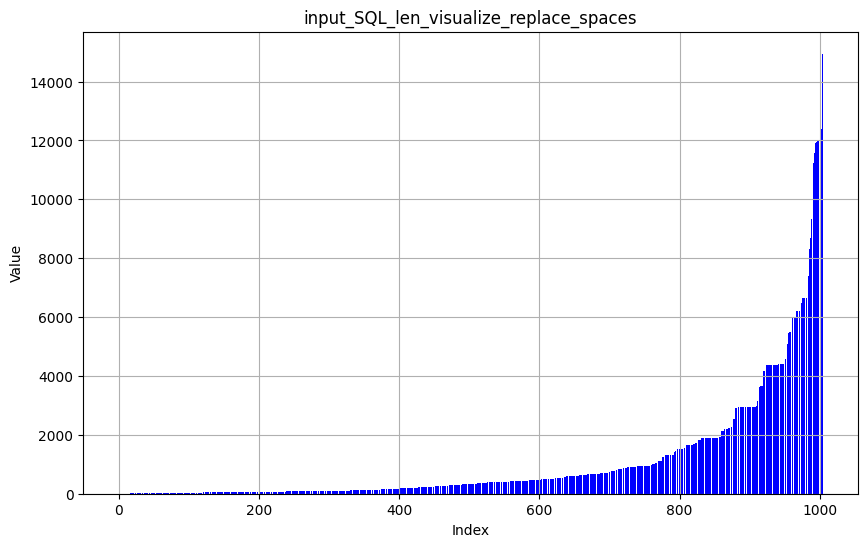

In [119]:
new_len_list = []
simplified_sql_list = []
for i in range(len(df_cleaned)):
    now_query = df_cleaned['query'].iloc[i]
    now_query = DELETE_blank(now_query)
    now_query = REPLACE_value_to_A(now_query)
    new_len_list.append(len(now_query))
    simplified_sql_list.append(now_query)

numbers_sorted = sorted(new_len_list)
print(numbers_sorted)
# Plotting the sorted numbers as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(numbers_sorted)), numbers_sorted, color='b')
plt.title('input_SQL_len_visualize_replace_spaces')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [121]:
for sql in simplified_sql_list:
    if 100 < len(sql) < 200:
        print(sql)

SELECT A, A, A, A, A, A, A, A, A(A) as A FROM A.A where A = 'A' and A >= 'A' group A A, A, A, A, A, A, A, A having A(A) > A and A(A) < A LIMIT A
SELECT A, A, A,A, A, A, A, A FROM A.A where A = 'A' and (A = 'A' or A = 'A') and A >= 'A' and A <= 'A' and A = 'A'
select distinct A,A from A.A where A= 'A' and A like 'A' and A in ('A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A')
SELECT 'A' as A, A , A(A(A) / A(A) * A, A) AS A , A(A(A) / A(A) * A, A) AS A , A(A(A) / A(A) * A, A) AS A , A(A(A) / A(A) * A, A) AS A FROM A.A WHERE A>='A' and A='A' GROUP A A ORDER A A LIMIT A
SELECT A, A, A, A, A, A, A, A, A, A,* FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A='A' and A in ('A', 'A', 'A', 'A', 'A') LIMIT A
SELECT A, A, A, A, A(DISTINCT A) as A, A(A) A FROM A.A WHERE A = 'A' and A in ('A','A','A','A','A') and A > 'A' and A >= 'A' and A <= 'A' GROUP A A, A, A, A ORDER A A
select A, A(A as A), A , A('A', A, A(A as A)) , A('A', A, A) , A

In [134]:
import re

queries = [
    "SELECT A, A, A, A, A, A(A,A,A) as A ,A(A(A),A) as A FROM A.A WHERE A>='A' AND A<='A' AND A>='A' AND A<='A' and A = 'A' group A A, A, A, A, A, A having A(A) >= A LIMIT A",
    "SELECT A, A, A, A, A, A, A, A, A,* FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A in ('A') LIMIT A",
    "SELECT A, A, A, A, A, A, A, A, A,* FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A in ('A') LIMIT A",
    "SELECT A, A, A, A, A, A FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A='A' and A='A' LIMIT A",
    "select A, A(A(A as A) ) A, A(distinct A) A FROM A.A where A='A' and A='A' and (A like 'A') and A='A' group A A",
    "select distinct A from A.A where A= 'A' and A like 'A' and A in ('A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A')",
    "SELECT A, A, A, A, A, A FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A='A' and A='A' LIMIT A",
    "select A, A(A as A), A , A('A', A, A(A as A)) , A('A', A, A) , A(A(A as A) = A, A, A) from A.A where A='A' and A='A' limit A",
    "SELECT A, A(A) AS A, A(A) AS A ,A FROM A.A WHERE A = 'A' AND A = 'A' AND A = 'A' GROUP A A, A ORDER A A A LIMIT A"
]

def REPLACE_consecutive_A_to_B(query):
    # Replace consecutive A with B
    query = re.sub(r'\b(A,\s*){2,}A\b', 'B', query)
    query = re.sub(r"\('A',\s*'A'(,\s*'A')*\)", '(B)', query)
    return query
replaced_queries = [REPLACE_consecutive_A_to_B(query) for query in queries]
for i, q in enumerate(replaced_queries):
    print(f"Query {i+1}: {q}")

Query 1: SELECT B(B) as A ,A(A(A),A) as A FROM A.A WHERE A>='A' AND A<='A' AND A>='A' AND A<='A' and A = 'A' group A B having A(A) >= A LIMIT A
Query 2: SELECT B,* FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A in ('A') LIMIT A
Query 3: SELECT B,* FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A in ('A') LIMIT A
Query 4: SELECT B FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A='A' and A='A' LIMIT A
Query 5: select A, A(A(A as A) ) A, A(distinct A) A FROM A.A where A='A' and A='A' and (A like 'A') and A='A' group A A
Query 6: select distinct A from A.A where A= 'A' and A like 'A' and A in (B)
Query 7: SELECT B FROM A.A WHERE A='A' and A='A' and A='A' and A='A' and A='A' and A='A' LIMIT A
Query 8: select A, A(A as A), A , A('A', A, A(A as A)) , A('A', A, A) , A(A(A as A) = B) from A.A where A='A' and A='A' limit A
Query 9: SELECT A, A(A) AS A, A(A) AS A ,A FROM A.A WHERE A = 'A' AND A = 'A' AND A = 'A' GROUP A A, A ORDER A A A LIMIT A


[1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 12, 12, 17, 17, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 27, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 37, 37, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 46, 47, 47, 49, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 58, 58, 58, 58, 58, 58, 58, 59, 60, 60, 60, 60, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 65, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 69, 70, 70

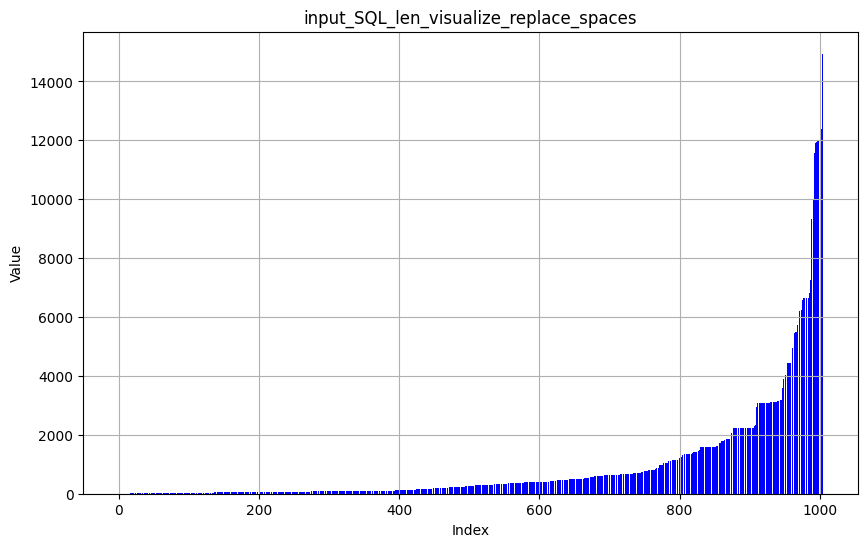

In [137]:
new_len_list = []
simplified_sql_list = []
for i in range(len(df_cleaned)):
    now_query = df_cleaned['query'].iloc[i]
    now_query = DELETE_blank(now_query)
    now_query = REPLACE_value_to_A(now_query)
    now_query = REPLACE_consecutive_A_to_B(now_query)
    new_len_list.append(len(now_query))
    simplified_sql_list.append(now_query)

numbers_sorted = sorted(new_len_list)
print(numbers_sorted)
# Plotting the sorted numbers as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(numbers_sorted)), numbers_sorted, color='b')
plt.title('input_SQL_len_visualize_replace_spaces')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

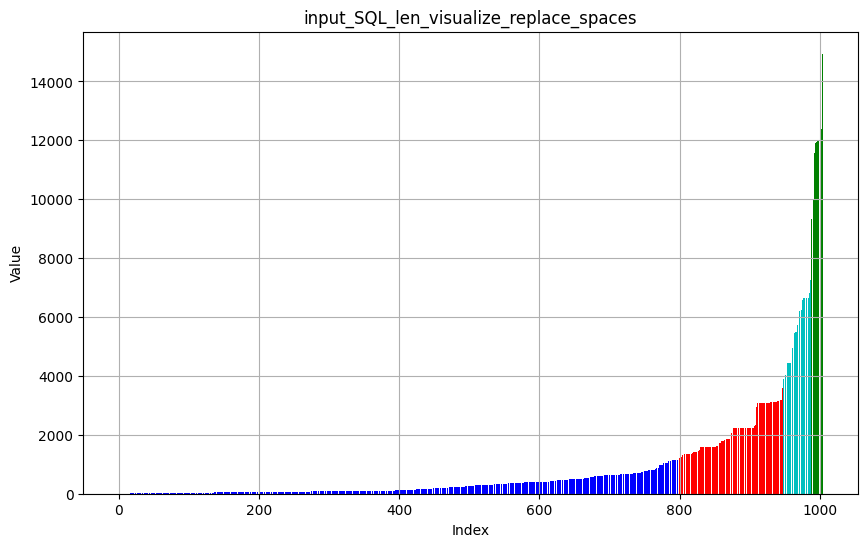

In [141]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# numbers_sorted 데이터를 numpy 배열로 변환
data = np.array(numbers_sorted).reshape(-1, 1)

# 클러스터 개수 설정 (예: 3개 클러스터로 설정)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

# 클러스터별로 색상을 다르게 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cluster_colors = [colors[label] for label in clusters]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(numbers_sorted)), numbers_sorted, color=cluster_colors)
plt.title('input_SQL_len_visualize_replace_spaces')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [142]:
import re
from collections import Counter

def count_sql_keywords(sql_query):
    # Convert the query to uppercase to make the search case-insensitive
    sql_query_upper = sql_query.upper()
    
    # List of keywords to count
    keywords = ['SELECT', 'FROM', 'WHERE', 'JOIN', 'ORDER BY', 'GROUP BY', 'HAVING', 'INSERT INTO', 'VALUES', 'UPDATE', 'SET', 'DELETE']
    
    # Create a counter to count occurrences of each keyword
    keyword_counts = Counter()
    
    for keyword in keywords:
        # Use regular expression to find all occurrences of the keyword
        pattern = re.compile(r'\b' + keyword + r'\b')
        matches = pattern.findall(sql_query_upper)
        keyword_counts[keyword] = len(matches)
    
    return keyword_counts

# Example usage
sql_query = """
SELECT name, age FROM users WHERE age > 18
SELECT id FROM orders WHERE price > 100
ORDER BY name
"""

keyword_counts = count_sql_keywords(sql_query)
print(keyword_counts)


Counter({'SELECT': 2, 'FROM': 2, 'WHERE': 2, 'ORDER BY': 1, 'JOIN': 0, 'GROUP BY': 0, 'HAVING': 0, 'INSERT INTO': 0, 'VALUES': 0, 'UPDATE': 0, 'SET': 0, 'DELETE': 0})


## 길이 기반 말고, 사용된 SQL명령어 카운트 기반으로 클러스터링

In [143]:
sql_commands = [
    "SELECT",
    "FROM",
    "WHERE",
    "JOIN",
    "WITH",
    "AS",
    "ORDER BY",
    "LIMIT",
    "CASE",
    "WHEN",
    "THEN",
    "LEFT JOIN",
    "ON",
    "INTERVAL",
    "TO_DATE",
    "ROUND",
    "IF",
    "SUM",
    "ROW_NUMBER",
    "PARTITION BY",
    "OVER",
    "CONCAT",
    "CAST",
    "GROUP BY",
    "SUBSTR",
    "DISTINCT",
    "RIGHT JOIN",
    "FULL OUTER JOIN",
    "CROSS JOIN",
    "UNION",
    "UNION ALL",
    "MIN",
    "MAX",
    "AVG",
    "COUNT",
    "HAVING",
    "EXISTS",
    "NOT EXISTS",
    "ANY",
    "ALL",
    "IN",
    "NOT IN",
    "BETWEEN",
    "LIKE",
    "RANK",
    "DENSE_RANK",
    # AWS Athena specific commands
    "UNLOAD",
    "USING",
    "EXTERNAL",
    "LOCATION",
    "STORED AS",
    "SERDE",
    "WITH SERDEPROPERTIES",
    "WITH PARAMETERS",
    "TBLPROPERTIES",
    "MSCK REPAIR TABLE",
    "ADD PARTITION",
    "DROP PARTITION",
    "SHOW PARTITIONS",
    "SHOW CREATE TABLE",
    "SHOW TBLPROPERTIES",
    "DESCRIBE",
    "SHOW DATABASES",
    "SHOW TABLES",
    "SHOW COLUMNS",
    "SHOW FUNCTIONS",
    "ANALYZE",
    "VACUUM",
    "COPY INTO",
    "ALTER TABLE",
    "ALTER DATABASE",
    "ALTER VIEW",
    "REFRESH TABLE",
    "REFRESH DATABASE",
    "MERGE INTO"
]

## GPT4o를 통해 sql커맨드의 난이도를 llm eval

###instruction
너는 자연어를 입력받아 sql문을 생성하는 챗봇이야. 입력으로 sql키워드 리스트를 받아서, 자연어를 sql문으로 만들 때 사용하는 각 키워드의 난이도를 0~1사이 실수로 점수를 매기고, 각 키워드 오른쪽에 주석의 형태로 난이도 책정의 이유를 논리적으로 설명해봐.

###input
sql_commands = [
    "SELECT",
    "FROM",
    "WHERE",
    "JOIN",
    "WITH",
    "AS",
    "ORDER BY",
    "LIMIT",
    "CASE",
    "WHEN",
    "THEN",
    "LEFT JOIN",
    "ON",
    "INTERVAL",
    "TO_DATE",
    "ROUND",
    "IF",
    "SUM",
    "ROW_NUMBER",
    "PARTITION BY",
    "OVER",
    "CONCAT",
    "CAST",
    "GROUP BY",
    "SUBSTR",
    "DISTINCT",
    "RIGHT JOIN",
    "FULL OUTER JOIN",
    "CROSS JOIN",
    "UNION",
    "UNION ALL",
    "MIN",
    "MAX",
    "AVG",
    "COUNT",
    "HAVING",
    "EXISTS",
    "NOT EXISTS",
    "ANY",
    "ALL",
    "IN",
    "NOT IN",
    "BETWEEN",
    "LIKE",
    "RANK",
    "DENSE_RANK",
    # AWS Athena specific commands
    "UNLOAD",
    "USING",
    "EXTERNAL",
    "LOCATION",
    "STORED AS",
    "SERDE",
    "WITH SERDEPROPERTIES",
    "WITH PARAMETERS",
    "TBLPROPERTIES",
    "MSCK REPAIR TABLE",
    "ADD PARTITION",
    "DROP PARTITION",
    "SHOW PARTITIONS",
    "SHOW CREATE TABLE",
    "SHOW TBLPROPERTIES",
    "DESCRIBE",
    "SHOW DATABASES",
    "SHOW TABLES",
    "SHOW COLUMNS",
    "SHOW FUNCTIONS",
    "ANALYZE",
    "VACUUM",
    "COPY INTO",
    "ALTER TABLE",
    "ALTER DATABASE",
    "ALTER VIEW",
    "REFRESH TABLE",
    "REFRESH DATABASE",
    "MERGE INTO"
]

###output_format
sql_command_weights = {
    "SELECT": ?,
    "FROM": ?,
    "WHERE": ?,
    "JOIN": ?,

In [230]:
sql_command_weights = {
    "SELECT": 0.1, # 기본 SQL 구문이며, 데이터베이스에서 데이터를 선택하는 데 사용됨. 기본적인 문법으로 비교적 쉽다.
    "FROM": 0.1, # 데이터를 추출할 테이블을 지정하는 데 사용. 기본적인 SQL 문법의 일부로 쉽게 이해할 수 있다.
    "WHERE": 0.1, # 조건을 지정하여 데이터를 필터링하는 데 사용. 조건식 작성의 난이도가 조금 있지만 비교적 이해하기 쉬운 편.
    "JOIN": 0.5, # 두 개 이상의 테이블을 결합하는 데 사용. 결합 조건과 다양한 형태의 조인을 이해하는 데 약간의 난이도가 있다.
    "WITH": 0.6, # 서브쿼리를 정의하는 데 사용되는 공통 테이블 표현식(CTE) 구문. 서브쿼리를 다루는 점에서 약간의 복잡성이 있다.
    "AS": 0.1, # 별칭을 지정하는 데 사용. 단순한 구문으로 이해하기 쉽다.
    "ORDER BY": 0.1, # 결과 집합을 정렬하는 데 사용. 기본적인 정렬 개념으로 이해하기 쉬움.
    "LIMIT": 0.1, # 반환할 행의 수를 제한하는 데 사용. 사용법이 간단하여 이해하기 쉽다.
    "CASE": 0.5, # 조건에 따라 다른 값을 반환하는 데 사용. 다양한 조건을 처리할 수 있어 약간의 복잡성이 있다.
    "WHEN": 0.5, # CASE 구문의 일부로 조건을 지정. CASE 구문과 함께 이해해야 하므로 난이도가 비슷하다.
    "THEN": 0.5, # CASE 구문의 일부로 조건이 참일 때 반환할 값을 지정. WHEN과 유사한 난이도.
    "LEFT JOIN": 0.6, # 기본 JOIN에 비해 약간 더 복잡한 개념으로, 왼쪽 테이블의 모든 행과 오른쪽 테이블의 일치하는 행을 결합.
    "ON": 0.4, # JOIN 조건을 지정하는 데 사용. JOIN 구문과 함께 사용되므로 약간의 복잡성이 있다.
    "INTERVAL": 0.4, # 날짜나 시간을 조작하는 데 사용. 시간 연산을 이해해야 하므로 약간의 난이도가 있다.
    "TO_DATE": 0.3, # 문자열을 날짜로 변환하는 데 사용. 변환 함수로 이해하기 쉬움.
    "ROUND": 0.2, # 숫자를 반올림하는 데 사용. 수학적 함수로 이해하기 쉬움.
    "IF": 0.4, # 조건에 따라 다른 값을 반환하는 함수. 논리적 조건 처리가 필요하여 약간의 난이도가 있다.
    "SUM": 0.2, # 집계 함수로, 숫자의 합계를 구하는 데 사용. 단순한 집계 함수로 이해하기 쉬움.
    "ROW_NUMBER": 0.5, # 결과 집합에 순위 번호를 할당하는 윈도우 함수. 윈도우 함수 개념을 이해해야 하므로 난이도가 있다.
    "PARTITION BY": 0.5, # 윈도우 함수의 일부로, 결과 집합을 파티션으로 나누는 데 사용. 윈도우 함수와 함께 이해해야 하므로 난이도가 있다.
    "OVER": 0.5, # 윈도우 함수의 일부로, 윈도우를 정의하는 데 사용. 윈도우 함수와 함께 이해해야 하므로 난이도가 있다.
    "CONCAT": 0.2, # 문자열을 연결하는 함수. 사용법이 단순하여 이해하기 쉽다.
    "CAST": 0.3, # 데이터 타입을 변환하는 함수. 다양한 데이터 타입을 이해해야 하므로 약간의 난이도가 있다.
    "GROUP BY": 0.4, # 데이터를 그룹화하여 집계 결과를 생성하는 데 사용. 집계와 그룹화를 이해해야 하므로 약간의 난이도가 있다.
    "SUBSTR": 0.3, # 문자열의 일부를 추출하는 함수. 문자열 처리에 대한 기본 이해가 필요.
    "DISTINCT": 0.3, # 중복된 값을 제거하는 데 사용. 단순한 개념이지만 대용량 데이터에서는 성능 문제를 고려해야 함.
    "RIGHT JOIN": 0.6, # 오른쪽 테이블의 모든 행과 왼쪽 테이블의 일치하는 행을 결합. JOIN의 복잡성을 포함.
    "FULL OUTER JOIN": 0.7, # 두 테이블의 모든 행을 결합하며 일치하지 않는 행도 포함. 가장 복잡한 JOIN 형태 중 하나.
    "CROSS JOIN": 0.6, # 두 테이블의 모든 행을 결합하여 데카르트 곱을 생성. 사용 시 주의가 필요하여 난이도가 있다.
    "UNION": 0.5, # 두 결과 집합을 결합하여 중복을 제거. 중복을 처리하는 점에서 약간의 복잡성이 있다.
    "UNION ALL": 0.5, # 두 결과 집합을 결합하되 중복을 제거하지 않음. UNION과 비슷한 난이도.
    "MIN": 0.2, # 집계 함수로, 최소값을 구하는 데 사용. 단순한 집계 함수로 이해하기 쉽다.
    "MAX": 0.2, # 집계 함수로, 최대값을 구하는 데 사용. 단순한 집계 함수로 이해하기 쉽다.
    "AVG": 0.2, # 집계 함수로, 평균값을 구하는 데 사용. 단순한 집계 함수로 이해하기 쉽다.
    "COUNT": 0.2, # 집계 함수로, 행의 수를 구하는 데 사용. 단순한 집계 함수로 이해하기 쉽다.
    "HAVING": 0.4, # GROUP BY 결과에 조건을 적용하는 데 사용. WHERE과 유사하지만 그룹화된 데이터에 적용되므로 약간의 난이도가 있다.
    "EXISTS": 0.5, # 서브쿼리의 결과 존재 여부를 확인하는 조건문. 서브쿼리를 이해해야 하므로 난이도가 있다.
    "NOT EXISTS": 0.5, # 서브쿼리의 결과 존재 여부가 거짓인지 확인하는 조건문. EXISTS와 비슷한 난이도.
    "ANY": 0.4, # 서브쿼리의 결과 중 하나라도 조건을 만족하는지 확인. 서브쿼리를 이해해야 하므로 약간의 난이도가 있다.
    "ALL": 0.4, # 서브쿼리의 결과가 모두 조건을 만족하는지 확인. 서브쿼리를 이해해야 하므로 약간의 난이도가 있다.
    "IN": 0.3, # 지정된 목록이나 서브쿼리의 결과에 값이 포함되는지 확인. 간단한 조건문이지만 서브쿼리 사용 시 약간의 난이도가 있다.
    "NOT IN": 0.3, # 지정된 목록이나 서브쿼리의 결과에 값이 포함되지 않는지 확인. IN과 비슷한 난이도.
    "BETWEEN": 0.3, # 값이 두 값 사이에 있는지 확인. 간단한 조건문으로 이해하기 쉽다.
    "LIKE": 0.3, # 문자열 패턴 매칭을 위한 조건문. 기본적인 패턴 매칭으로 이해하기 쉬움.
    "RANK": 0.5, # 결과 집합에 순위를 매기는 윈도우 함수. 윈도우 함수의 개념을 이해해야 하므로 약간의 난이도가 있다.
    "DENSE_RANK": 0.5, # 결과 집합에 중복 없이 순위를 매기는 윈도우 함수. RANK와 비슷한 난이도.
    "UNLOAD": 0.5, # AWS Athena에서 결과를 파일로 저장하는 명령어. AWS 서비스와의 연동을 이해해야 하므로 약간의 난이도가 있다.
    "USING": 0.4, # 테이블 결합 시 사용할 칼럼을 지정하는 조건. JOIN 구문과 함께 사용되어 약간의 난이도가 있다.
    "EXTERNAL": 0.5, # 외부 테이블을 정의하는 데 사용. 외부 데이터 소스를 이해해야 하므로 약간의 난이도가 있다.
    "LOCATION": 0.4, # 외부 테이블의 위치를 지정. 외부 데이터 소스를 이해해야 하므로 약간의 난이도가 있다.
    "STORED AS": 0.4, # 데이터 저장 형식을 지정. 다양한 저장 형식을 이해해야 하므로 약간의 난이도가 있다.
    "SERDE": 0.5, # 직렬화 및 역직렬화 라이브러리를 지정. 기술적인 이해가 필요하여 난이도가 있다.
    "WITH SERDEPROPERTIES": 0.5, # SERDE의 속성을 지정. 세부 속성을 이해해야 하므로 약간의 난이도가 있다.
    "WITH PARAMETERS": 0.5, # 테이블 생성 시 파라미터를 지정. 다양한 파라미터를 이해해야 하므로 약간의 난이도가 있다.
    "TBLPROPERTIES": 0.4, # 테이블 속성을 지정. 다양한 속성을 이해해야 하므로 약간의 난이도가 있다.
    "MSCK REPAIR TABLE": 0.6, # AWS Athena에서 테이블 파티션을 복구. 특정 서비스와의 연동을 이해해야 하므로 난이도가 있다.
    "ADD PARTITION": 0.4, # 테이블에 파티션을 추가. 파티션 개념을 이해해야 하므로 약간의 난이도가 있다.
    "DROP PARTITION": 0.4, # 테이블에서 파티션을 삭제. 파티션 개념을 이해해야 하므로 약간의 난이도가 있다.
    "SHOW PARTITIONS": 0.3, # 테이블의 파티션을 표시. 단순한 명령어로 이해하기 쉽다.
    "SHOW CREATE TABLE": 0.3, # 테이블 생성 스크립트를 표시. 단순한 명령어로 이해하기 쉽다.
    "SHOW TBLPROPERTIES": 0.3, # 테이블 속성을 표시. 단순한 명령어로 이해하기 쉽다.
    "DESCRIBE": 0.3, # 테이블 구조를 설명. 단순한 명령어로 이해하기 쉽다.
    "SHOW DATABASES": 0.3, # 데이터베이스 목록을 표시. 단순한 명령어로 이해하기 쉽다.
    "SHOW TABLES": 0.3, # 테이블 목록을 표시. 단순한 명령어로 이해하기 쉽다.
    "SHOW COLUMNS": 0.3, # 테이블의 칼럼을 표시. 단순한 명령어로 이해하기 쉽다.
    "SHOW FUNCTIONS": 0.3, # 사용 가능한 함수를 표시. 단순한 명령어로 이해하기 쉽다.
    "ANALYZE": 0.4, # 테이블 통계를 수집 및 분석. 데이터 분석 개념을 이해해야 하므로 약간의 난이도가 있다.
    "VACUUM": 0.4, # 테이블을 정리하여 저장 공간을 확보. 데이터 정리 개념을 이해해야 하므로 약간의 난이도가 있다.
    "COPY INTO": 0.5, # 데이터를 테이블에 복사. 데이터 이동 개념을 이해해야 하므로 약간의 난이도가 있다.
    "ALTER TABLE": 0.4, # 테이블 구조를 변경. 다양한 변경 옵션을 이해해야 하므로 약간의 난이도가 있다.
    "ALTER DATABASE": 0.4, # 데이터베이스 구조를 변경. 다양한 변경 옵션을 이해해야 하므로 약간의 난이도가 있다.
    "ALTER VIEW": 0.4, # 뷰 구조를 변경. 다양한 변경 옵션을 이해해야 하므로 약간의 난이도가 있다.
    "REFRESH TABLE": 0.3, # 테이블을 새로 고침. 단순한 명령어로 이해하기 쉽다.
    "REFRESH DATABASE": 0.3, # 데이터베이스를 새로 고침. 단순한 명령어로 이해하기 쉽다.
    "MERGE INTO": 0.6, # 테이블을 병합하여 업데이트. 데이터 병합 개념을 이해해야 하므로 난이도가 있다.
}



In [231]:
import pandas as pd

# Excel 파일 경로 설정
file_path = r'C:\Users\HOME\Desktop\skt_6_aifellowship\idcube-ai-assistant-fellowship\data_from_Chayoung\queryhistory_최근.xlsx'
a = "ConnectionAbortedError"
# Excel 파일 읽기
df = pd.read_excel(file_path)
# 'query' 컬럼의 값이 NaN인 행을 드롭하고 인덱스 리셋
df_cleaned = df.dropna(subset=['query']).reset_index(drop=True)
use_keyword_list = []
# 특정 컬럼의 값을 순회하며 처리하는 예제
for i in range(len(df_cleaned)):
    now_query = df_cleaned['query'].iloc[i]
    words = re.split(r'\W+', now_query.upper())
    extracted_commands = [word for word in words if word in sql_commands]
    use_keyword_list.append(len(extracted_commands))

sorted_use_keyword_list = sorted(use_keyword_list)

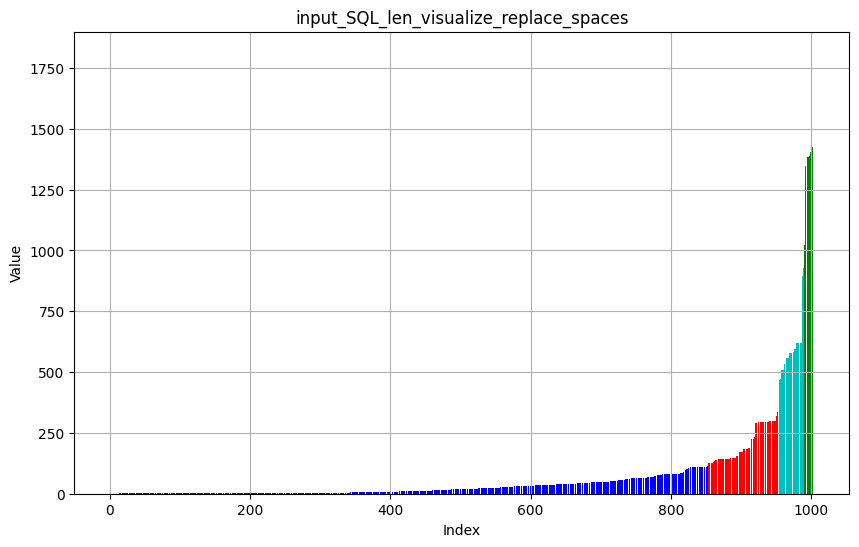

In [232]:
# numbers_sorted 데이터를 numpy 배열로 변환
data = np.array(sorted_use_keyword_list).reshape(-1, 1)

# 클러스터 개수 설정 (예: 3개 클러스터로 설정)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

# 클러스터별로 색상을 다르게 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cluster_colors = [colors[label] for label in clusters]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_use_keyword_list)), sorted_use_keyword_list, color=cluster_colors)
plt.title('input_SQL_len_visualize_replace_spaces')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [233]:
import pandas as pd

def calculate_query_difficulty(keyword_counts, weights):
    difficulty_score = 0
    for keyword, count in keyword_counts.items():
        difficulty_score += weights.get(keyword, 0) * count
    return difficulty_score

# Excel 파일 경로 설정
file_path = r'C:\Users\HOME\Desktop\skt_6_aifellowship\idcube-ai-assistant-fellowship\data_from_Chayoung\queryhistory_최근.xlsx'
a = "ConnectionAbortedError"
# Excel 파일 읽기
df = pd.read_excel(file_path)
# 'query' 컬럼의 값이 NaN인 행을 드롭하고 인덱스 리셋
df_cleaned = df.dropna(subset=['query']).reset_index(drop=True)
use_keyword_list = []
# 특정 컬럼의 값을 순회하며 처리하는 예제
for i in range(len(df_cleaned)):
    now_query = df_cleaned['query'].iloc[i]

    # count_open_closed_parentheses = now_query.count("(") + now_query.count(")") # 괄호 수 카운트
    
    command_counts = defaultdict(int)
    words = re.split(r'\W+', now_query.upper())
    for word in words:
        if word in sql_commands:
            command_counts[word] += 1

    command_count_dict = dict(command_counts)   
    score = calculate_query_difficulty(command_count_dict, sql_command_weights)
    use_keyword_list.append(score)

sorted_use_keyword_list = sorted(use_keyword_list)

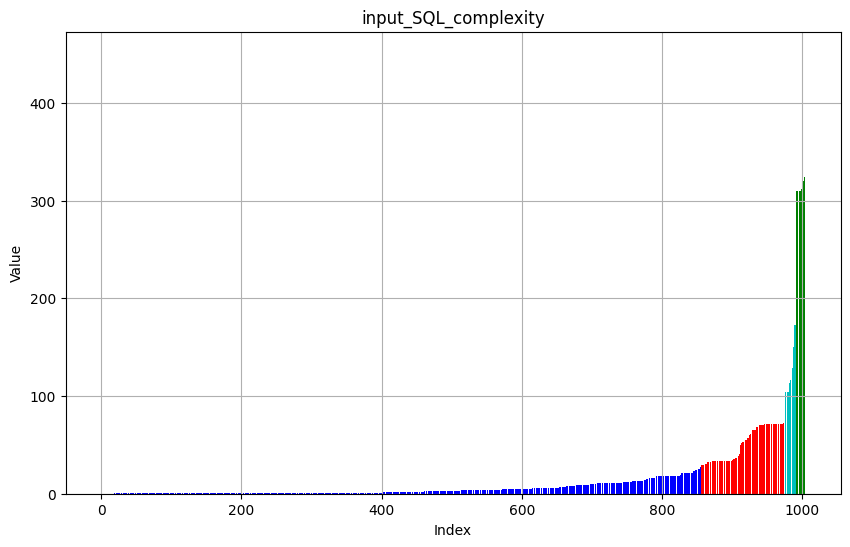

In [234]:
# numbers_sorted 데이터를 numpy 배열로 변환
data = np.array(sorted_use_keyword_list).reshape(-1, 1)

# 클러스터 개수 설정 (예: 3개 클러스터로 설정)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

# 클러스터별로 색상을 다르게 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cluster_colors = [colors[label] for label in clusters]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_use_keyword_list)), sorted_use_keyword_list, color=cluster_colors)
plt.title('input_SQL_complexity')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## 난이도 클러스터링 : 난이도별로 다른 llm agent로 추론하기 위한 선작업

##### SOTA(gemini1.5pro, gpt4, gpt4o, claudeOpus)에 대한 CoT 프롬프트를 통해서 구문 키워드(select, from, join, ...)의 난이도 가중치를 초기화
##### 1. 오픈소스 모델(8~15b)의 추론결과와 gold label을 N번 비교, N번의 오답이 어디서 나왔는지 집계
##### 2. 집계된 오답 구문 키워드의 난이도 가중치를 오답 횟수에 비례해 높임. 예를 들어 join절에서 오답이 자주 나오면, join키워드의 난이도 가중치를 높임
##### 위의 1.,2.과정을 다양한 오픈소스 모델(8~15b)에 대해 반복해서 다양한 구문 키워드 가중치 리스트를 얻음
##### 구문 키워드 가중치 리스트들의 평균값으로 최종 키워드 가중치를 확정
##### 확정된 구문 키워드 가중치 * SQL문에 등장한 구문 키워드 개수 의 총합을 SQL문의 난이도 점수로 취급
##### 난이도 점수를 sorting한 다음 클러스터링
##### 군집화된 sql문들을 각각 다른 llm agent에 학습시킴


